In [ ]:
import os
import time
import numpy as np
import collections
import matplotlib.pyplot as plt

from tqdm import trange
from constants import *
from scipy.special import k0
from ULDM_Simulator import *


plt.style.use('./myplot.mplstyle')
%load_ext autoreload
%autoreload 2

## FAST MODE

In [ ]:
def realize(k=0):
    size = 100

    v = np.linspace(0, 10, size)

    def f(v):
        return v**2 * np.exp(-v**2 / 2) / np.sqrt(2 * np.pi)**3 * 4 * np.pi

    r = np.random.rayleigh(size=size)
    theta= np.random.uniform(0, 2*np.pi, size=size)
    a = np.sqrt(f(v) / 2) * r * np.exp(1j * theta)

    a_mat = a[:, None] * a[None,:]
    asum = np.sum(a_mat)

    return np.abs(asum), np.arctan2(np.imag(asum),np.real(asum))

In [ ]:
tmp_abs = []
tmp_phase = []

for i in range(100000):
    a, b = realize()
    
    tmp_abs.append(a)
    tmp_phase.append(b)

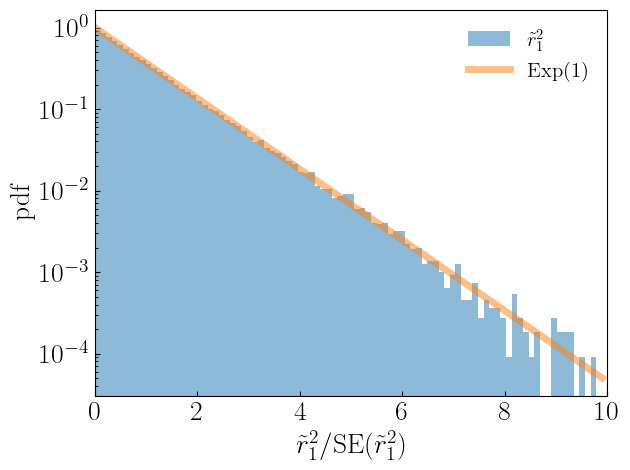

In [ ]:
fig, ax = plt.subplots()
x = np.arange(0,10, 0.1)

ax.hist(tmp_abs / np.std(tmp_abs), density=True, bins=100, alpha=0.5, label=r'$\tilde r_1^2$');
ax.plot(x, np.exp(-x), lw=5, alpha=0.5, label=r'${\rm Exp(1)}$')
ax.set_yscale('log')

ax.set_xlim(0,10)

ax.set_xlabel(r'$\tilde r_1^2 / {\rm SE}(\tilde r_1^2)$');
ax.set_ylabel(r'${\rm pdf}$');

ax.legend()
fig.tight_layout()
fig.savefig('./figs/r1sq.pdf')

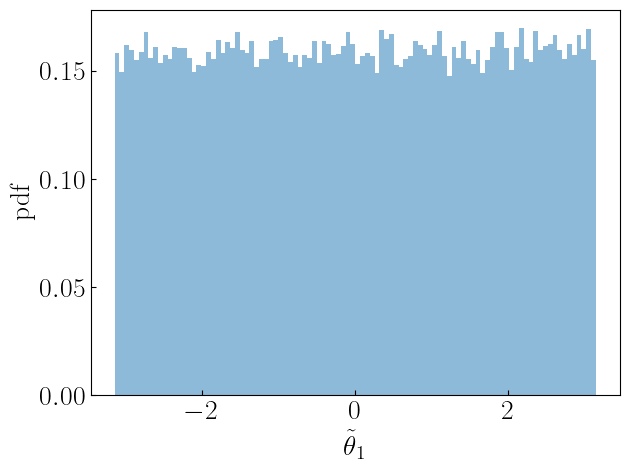

In [ ]:
fig, ax = plt.subplots()
x = np.arange(0,10, 0.1)

ax.hist(tmp_phase , density=True, bins=100, alpha=0.5, label=r'$\tilde \theta_1$');

ax.set_xlabel(r'$\tilde\theta_1$')
ax.set_ylabel(r'${\rm pdf}$')
fig.tight_layout()
fig.savefig('./figs/t1.pdf')